In [131]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [132]:
dataset = pd.read_csv("NewDataset.csv")
dataset = dataset.iloc[11:, :]
openVal = dataset.iloc[:, 45]
closeVal = dataset.iloc[:, 49]
openVal = openVal * 10**5
closeVal = closeVal * 10**5
openVal = openVal.values
closeVal = closeVal.values
test = []
for i in range(len(openVal)):
    if closeVal[i] - openVal[i] < 0:
        test.append(0)
    else:
        test.append(1)
print(openVal)
print(closeVal)
print(test)

[113540. 114367. 114195. ... 116033. 115923. 115952.]
[114368. 114274. 114191. ... 115923. 115953. 116040.]
[1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 

# Find high value by open value

In [133]:
x = dataset.iloc[:, 1:46]
y = dataset.iloc[:,   46]
x = x * 10**5
y = y * 10**5
x = x.values
y = y.values
y = y.reshape(len(y),1)
print(x)
print(y)

[[1.12e+05 1.12e+05 1.12e+05 ... 1.13e+05 3.11e+10 1.14e+05]
 [1.12e+05 1.12e+05 1.12e+05 ... 1.13e+05 3.78e+10 1.14e+05]
 [1.12e+05 1.12e+05 1.12e+05 ... 1.14e+05 9.34e+09 1.14e+05]
 ...
 [1.15e+05 1.16e+05 1.15e+05 ... 1.16e+05 1.31e+09 1.16e+05]
 [1.16e+05 1.16e+05 1.16e+05 ... 1.16e+05 1.49e+09 1.16e+05]
 [1.16e+05 1.16e+05 1.16e+05 ... 1.16e+05 2.00e+09 1.16e+05]]
[[114510.]
 [114448.]
 [114274.]
 ...
 [116124.]
 [116103.]
 [116060.]]


In [134]:
from xgboost import XGBRegressor
regressorHigh = XGBRegressor()
regressorHigh.fit(x, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [135]:
yPredHigh = regressorHigh.predict((x[:, :]))
np.set_printoptions(precision=2)
y = dataset.iloc[:, 46]
y = y * 10**5
y = y.values
print(np.concatenate((yPredHigh.reshape(len(yPredHigh), 1), y.reshape(len(y), 1)), 1))

[[113784.51 114510.  ]
 [114552.12 114448.  ]
 [114466.16 114274.  ]
 ...
 [116143.56 116124.  ]
 [116144.65 116103.  ]
 [116074.15 116060.  ]]


In [136]:
from sklearn.metrics import r2_score
r2_score(y, yPredHigh)

0.9998095156768664

In [137]:
diffHigh = []
for i in range(len(y)):
    diffHigh.append(abs(y[i] - yPredHigh[i]))
print(max(diffHigh))
print(np.mean(diffHigh))

1729.34375
118.01364432042705


# Find next low

In [138]:
x = dataset.iloc[:, 1:46]
x *= 10**5
x = x.values
x = np.concatenate((x, yPredHigh.reshape(len(yPredHigh), 1)), 1)
print(x)

[[1.12e+05 1.12e+05 1.12e+05 ... 3.11e+10 1.14e+05 1.14e+05]
 [1.12e+05 1.12e+05 1.12e+05 ... 3.78e+10 1.14e+05 1.15e+05]
 [1.12e+05 1.12e+05 1.12e+05 ... 9.34e+09 1.14e+05 1.14e+05]
 ...
 [1.15e+05 1.16e+05 1.15e+05 ... 1.31e+09 1.16e+05 1.16e+05]
 [1.16e+05 1.16e+05 1.16e+05 ... 1.49e+09 1.16e+05 1.16e+05]
 [1.16e+05 1.16e+05 1.16e+05 ... 2.00e+09 1.16e+05 1.16e+05]]


In [139]:
y = dataset.iloc[:, 47]
y *= 10**5
y = y.values
y = y.reshape(len(y),1)
print(y)

[[113358.]
 [114170.]
 [114015.]
 ...
 [115892.]
 [115893.]
 [115933.]]


In [140]:
from xgboost import XGBRegressor
regressorLow = XGBRegressor()
regressorLow.fit(x, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [141]:
yPredLow = regressorLow.predict((x[:, :]))
np.set_printoptions(precision=2)
y = dataset.iloc[:, 47].values
print(np.concatenate((yPredLow.reshape(len(yPredLow), 1), y.reshape(len(y), 1)), 1))

[[113406.65 113358.  ]
 [114280.9  114170.  ]
 [113946.96 114015.  ]
 ...
 [115907.79 115892.  ]
 [115761.99 115893.  ]
 [115838.25 115933.  ]]


In [142]:
from sklearn.metrics import r2_score
r2_score(y, yPredLow)

0.9998157367986772

In [143]:
diffLow = []
for i in range(len(y)):
    diffLow.append(abs(y[i] - yPredLow[i]))
print(max(diffLow))
print(np.mean(diffLow))

1608.03125
116.13577729080724


# Find close

In [144]:
x = dataset.iloc[:, 1:46]
x *= 10**5
x = x.values
x = np.concatenate((x, yPredHigh.reshape(len(yPredHigh), 1)), 1)
x = np.concatenate((x, yPredLow.reshape(len(yPredLow), 1)), 1)
print(x)

[[112354.   112354.   112166.   ... 113540.   113784.51 113406.65]
 [112242.   112276.   112067.   ... 114367.   114552.12 114280.9 ]
 [112139.   112255.   112030.   ... 114195.   114466.16 113946.96]
 ...
 [115430.   115788.   115405.   ... 116033.   116143.56 115907.79]
 [115781.   115975.   115780.   ... 115923.   116144.65 115761.99]
 [115961.   116013.   115925.   ... 115952.   116074.15 115838.25]]


In [145]:
y = dataset.iloc[:,   49]
y *= 10**5
y = y.values
y = y.reshape(len(y),1)
print(y)

[[114368.]
 [114274.]
 [114191.]
 ...
 [115923.]
 [115953.]
 [116040.]]


In [146]:
from xgboost import XGBRegressor
regressorClose = XGBRegressor()
regressorClose.fit(x, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [147]:
yPredClose = regressorClose.predict((x[:, :]))
np.set_printoptions(precision=2)
y = dataset.iloc[:, 49].values
print(np.concatenate((yPredClose.reshape(len(yPredClose), 1), y.reshape(len(y), 1)), 1))

[[113608.79 114368.  ]
 [114435.59 114274.  ]
 [114081.64 114191.  ]
 ...
 [115937.47 115923.  ]
 [115956.55 115953.  ]
 [115991.94 116040.  ]]


In [148]:
from sklearn.metrics import r2_score
r2_score(y, yPredClose)

0.9997090747983344

In [149]:
diffClose = []
for i in range(len(y)):
    diffClose.append(abs(y[i] - yPredClose[i]))
print(max(diffClose))
print(np.mean(diffClose))

1358.6328125
148.452101351


# Checking ascending

In [150]:
x = dataset.iloc[:, 1:46]
x *= 10**5
x = x.values
x = np.concatenate((x, yPredHigh.reshape(len(yPredHigh), 1)), 1)
x = np.concatenate((x, yPredLow.reshape(len(yPredLow), 1)), 1)
x = np.concatenate((x, yPredClose.reshape(len(yPredClose), 1)), 1)
print(x)

[[112354.   112354.   112166.   ... 113784.51 113406.65 113608.79]
 [112242.   112276.   112067.   ... 114552.12 114280.9  114435.59]
 [112139.   112255.   112030.   ... 114466.16 113946.96 114081.64]
 ...
 [115430.   115788.   115405.   ... 116143.56 115907.79 115937.47]
 [115781.   115975.   115780.   ... 116144.65 115761.99 115956.55]
 [115961.   116013.   115925.   ... 116074.15 115838.25 115991.94]]


In [151]:
from xgboost import XGBClassifier
classifierAscending = XGBClassifier()
classifierAscending.fit(x, test)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [152]:
from sklearn.metrics import confusion_matrix, accuracy_score
yPred = classifierAscending.predict(x)
cm = confusion_matrix(test, yPred)
print(cm)
accuracy_score(test, yPred)

[[11028  3171]
 [ 2469 12181]]


0.8044992894034455

In [153]:
diffHigh = np.array(diffHigh)
diffHigh = diffHigh.reshape(len(diffHigh), 1)
diffLow = np.array(diffLow)
diffLow = diffLow.reshape(len(diffLow), 1)
diffClose = np.array(diffClose)
diffClose = diffClose.reshape(len(diffClose), 1)
df = pd.DataFrame(np.array(diffClose))
diffHigh = np.array(diffHigh)
diffLow = np.array(diffLow)
df.insert(0, 'close error', diffClose)
df.insert(0, 'low error', diffLow)
df.insert(0, 'high error', diffHigh)
df.to_csv('errors.csv')

In [155]:
dataset = pd.read_csv('errors.csv')
dataset = dataset.iloc[:, 1:-1]
print(dataset)

       high error   low error  close error
0      725.492188   48.648438   759.210938
1      104.117188  110.898438   161.585937
2      192.164062   68.039062   109.359375
3       14.140625   43.062500    92.921875
4       69.828125   87.570312   112.523438
...           ...         ...          ...
28844   60.812500  118.945313    49.007812
28845   59.609375   41.070312    73.023438
28846   19.562500   15.789062    14.468750
28847   41.648438  131.007812     3.554688
28848   14.148437   94.750000    48.062500

[28849 rows x 3 columns]


In [156]:
x = []
for i in range(28849):
    x.append(i)

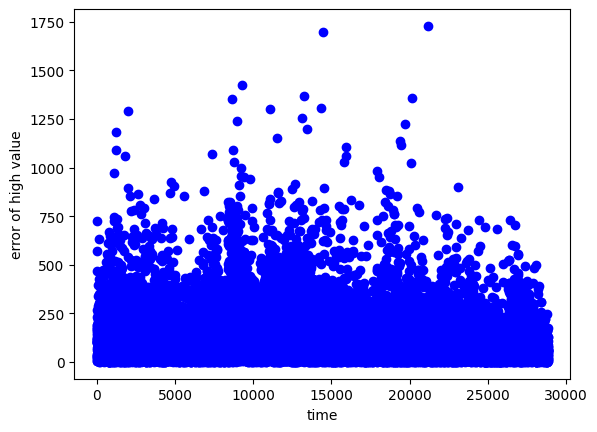

In [157]:
high = dataset.iloc[:, 0].values
plt.scatter(x=x, y=high, c='blue')
plt.xlabel('time')
plt.ylabel('error of high value')
plt.rcParams["figure.figsize"] = (20,3)
plt.show()

In [158]:
counterHigh = 0
for i in range(len(high)):
    if high[i] < 100:
        counterHigh += 1
print(counterHigh)

15837


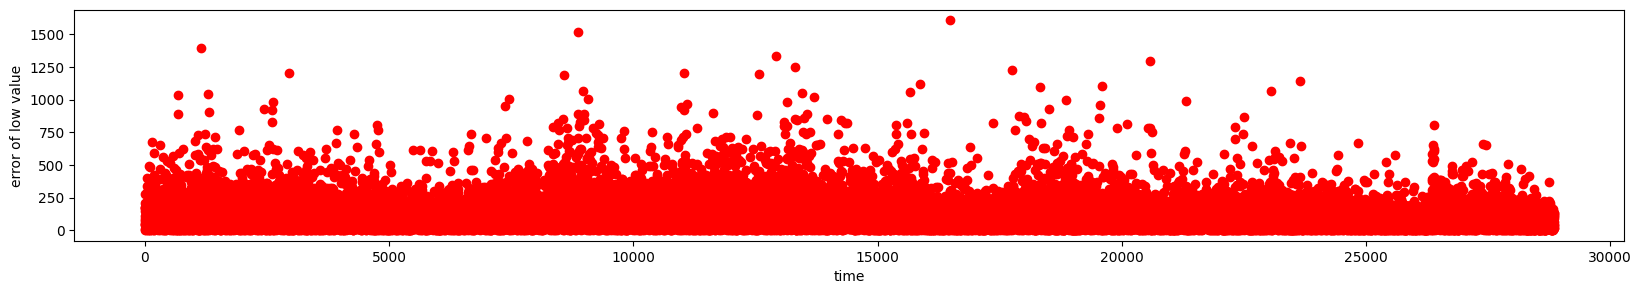

In [159]:
low = dataset.iloc[:, 1].values
plt.scatter(x=x, y=low, c='red')
plt.xlabel('time')
plt.ylabel('error of low value')
plt.rcParams["figure.figsize"] = (20,3)
plt.show()

In [160]:
counterLow = 0
for i in range(len(low)):
    if low[i] < 100:
        counterLow+=1
print(counterLow)

15966


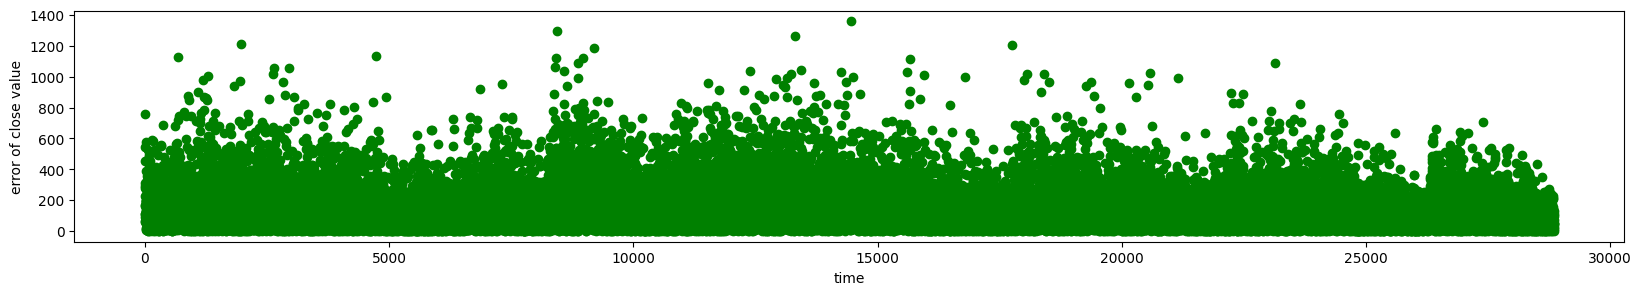

In [161]:
close = dataset.iloc[:, 2].values
plt.scatter(x=x, y=close, c='green')
plt.xlabel('time')
plt.ylabel('error of close value')
plt.rcParams["figure.figsize"] = (20,3)
plt.show()

In [162]:
counterClose = 0
for i in range(len(close)):
    if close[i] < 100:
        counterClose+=1
print(counterClose)

13372


In [163]:
print("percent of under 100 for high is " + str((counterHigh/len(high))*100))
print("percent of under 100 for low is " + str((counterLow/len(low))*100))
print("percent of under 100 for close is " + str((counterClose/len(close))*100))

percent of under 100 for high is 54.89618357655378
percent of under 100 for low is 55.343339457173556
percent of under 100 for close is 46.35169329959444


In [164]:
counterHigh = 0
for i in range(len(high)):
    if high[i] < 200:
        counterHigh += 1
counterLow = 0
for i in range(len(low)):
    if low[i] < 200:
        counterLow+=1
counterClose = 0
for i in range(len(close)):
    if close[i] < 200:
        counterClose+=1
print("percent of under 200 for high is " + str((counterHigh/len(high))*100))
print("percent of under 200 for low is " + str((counterLow/len(low))*100))
print("percent of under 200 for close is " + str((counterClose/len(close))*100))

percent of under 200 for high is 84.11036777704601
percent of under 200 for low is 84.22475649069293
percent of under 200 for close is 74.43932198689728


In [165]:
counterHigh = 0
for i in range(len(high)):
    if high[i] < 150:
        counterHigh += 1
counterLow = 0
for i in range(len(low)):
    if low[i] < 150:
        counterLow+=1
counterClose = 0
for i in range(len(close)):
    if close[i] < 150:
        counterClose+=1
print("percent of under 150 for high is " + str((counterHigh/len(high))*100))
print("percent of under 150 for low is " + str((counterLow/len(low))*100))
print("percent of under 150 for close is " + str((counterClose/len(close))*100))

percent of under 150 for high is 72.65763111373012
percent of under 150 for low is 73.21224305868488
percent of under 150 for close is 62.76820687025547
